Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56636 entries, 0 to 56635
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0.1                       56636 non-null  int64  
 1   Unnamed: 0                         56636 non-null  int64  
 2   Parcel ID                          56636 non-null  object 
 3   Land Use                           56636 non-null  object 
 4   Property Address                   56477 non-null  object 
 5   Suite/ Condo   #                   6109 non-null   object 
 6   Property City                      56477 non-null  object 
 7   Sale Date                          56636 non-null  object 
 8   Sale Price                         56636 non-null  int64  
 9   Legal Reference                    56636 non-null  object 
 10  Sold As Vacant                     56636 non-null  object 
 11  Multiple Parcels Involved in Sale  56636

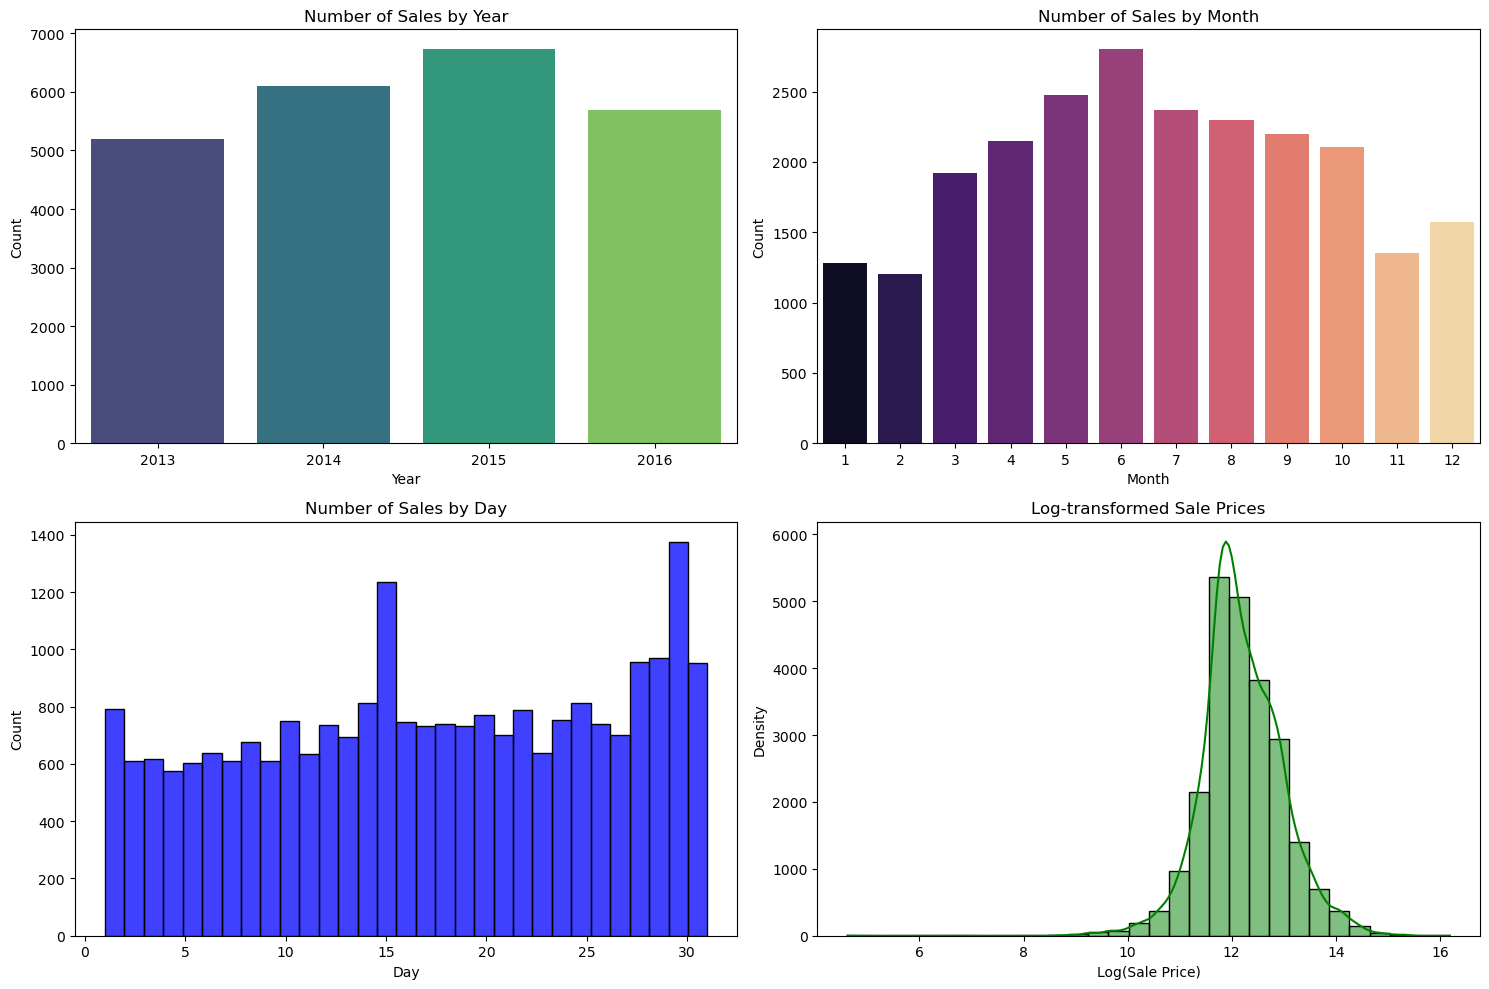

In [2]:
# Import necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path for your dataset
file_path = r"C:\Users\Jepbar\Desktop\NashvilleHousing_MySQL_Project\New one\Nashville_housing_data_2013_2016.csv"

# Load the dataset
nashville = pd.read_csv(file_path)

# Initial data overview
print("Dataset Info:")
nashville.info()

# Step 1: Drop "Suite/ Condo #" column
if 'Suite/ Condo   #' in nashville.columns:
    nashville.drop(columns=['Suite/ Condo   #'], inplace=True)
    print("\nDropped 'Suite/ Condo #' column.")

# Step 2: Drop rows with missing values to ensure 100% clean data
print(f"\nOriginal dataset shape: {nashville.shape}")
nashville.dropna(inplace=True)
print(f"Dataset shape after dropping rows with missing values: {nashville.shape}")

# Step 3: Format date columns
# Convert 'Sale Date' to datetime and extract useful features
if 'Sale Date' in nashville.columns:
    nashville['sale_date'] = pd.to_datetime(nashville['Sale Date'], errors='coerce')
    nashville['sale_year'] = nashville['sale_date'].dt.year
    nashville['sale_month'] = nashville['sale_date'].dt.month
    nashville['sale_day'] = nashville['sale_date'].dt.day

# Step 4: Remove duplicates
nashville.drop_duplicates(inplace=True)
print(f"Dataset shape after removing duplicates: {nashville.shape}")

# Step 5: Standardize column names
nashville.columns = [col.strip().lower().replace(' ', '_') for col in nashville.columns]

# Step 6: Outlier handling - Log transform 'sale_price' if present
if 'sale_price' in nashville.columns:
    nashville['log_sale_price'] = np.log1p(nashville['sale_price'])

# Step 7: Save cleaned data
cleaned_file_path = r"C:\Users\Jepbar\Desktop\NashvilleHousing_MySQL_Project\New one\Nashville_Housing_1Cleaned.csv"
nashville.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")

# Visualize trends in sales by year, month, and day
plt.figure(figsize=(15, 10))

# Sales by Year
plt.subplot(2, 2, 1)
sns.countplot(x='sale_year', data=nashville, palette="viridis")
plt.title("Number of Sales by Year")
plt.xlabel("Year")
plt.ylabel("Count")

# Sales by Month
plt.subplot(2, 2, 2)
sns.countplot(x='sale_month', data=nashville, palette="magma")
plt.title("Number of Sales by Month")
plt.xlabel("Month")
plt.ylabel("Count")

# Sales by Day
plt.subplot(2, 2, 3)
sns.histplot(nashville['sale_day'], bins=31, kde=False, color="blue")
plt.title("Number of Sales by Day")
plt.xlabel("Day")
plt.ylabel("Count")

# Log-transformed Sale Prices
if 'log_sale_price' in nashville.columns:
    plt.subplot(2, 2, 4)
    sns.histplot(nashville['log_sale_price'], bins=30, kde=True, color="green")
    plt.title("Log-transformed Sale Prices")
    plt.xlabel("Log(Sale Price)")
    plt.ylabel("Density")

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
from sqlalchemy import create_engine

# File path for your dataset
file_path = r"C:\Users\Jepbar\Desktop\NashvilleHousing_MySQL_Project\New one\Nashville_Housing_1Cleaned.csv"

# Load the dataset into a DataFrame
nashville_data = pd.read_csv(file_path)

# MySQL database connection details for Database2
MYSQL_USER = "root"
MYSQL_PASSWORD = "Arashev3211!"
MYSQL_HOST = "127.0.0.1"
MYSQL_PORT = 3306
MYSQL_DB = "database2"  # Change to your target database

# Create the MySQL connection engine
engine = create_engine(f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASSWORD}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}")

# Define the target table name
table_name = "nashville_data"  # Table to hold all the imported data

# Upload the data to Database2
try:
    nashville_data.to_sql(
        name=table_name,
        con=engine,
        if_exists='replace',  # Replace the table if it exists
        index=False           # Avoid including the DataFrame index as a column
    )
    print(f"Data successfully uploaded to the '{table_name}' table in the '{MYSQL_DB}' database.")
except Exception as e:
    print(f"An error occurred while uploading the data: {e}")


Data successfully uploaded to the 'nashville_data' table in the 'database2' database.
